In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import Counter

In [2]:
games19 = pd.read_csv("mlb_data/2019_games.csv")
atbats19 = pd.read_csv("mlb_data/2019_atbats.csv")
pitches19 = pd.read_csv("mlb_data/2019_pitches.csv")
players = pd.read_csv("mlb_data/player_names.csv")

In [3]:
pitcher = pd.DataFrame()
for x in range(len(players)):
    if (players['last_name'][x] == 'deGrom') == True:
        pitcher = pitcher.append(pd.DataFrame(players.loc[[x]]))
pitcher = pitcher.reset_index(drop = True)

In [4]:
pitcher_at_bats = pd.DataFrame()
for x in range(len(atbats19)):
    if(atbats19['pitcher_id'][x] == pitcher['id'][0]) == True:
        pitcher_at_bats = pitcher_at_bats.append(pd.DataFrame(atbats19.loc[[x]]))
pitcher_at_bats = pitcher_at_bats.reset_index(drop = True)

In [5]:
pitcher_game_summary = pd.DataFrame()
for k in range(len(pitcher_at_bats)):
    for x in range(len(games19)):
        if ( pitcher_at_bats['g_id'][k] == games19['g_id'][x]) == True:
            pitcher_game_summary = pitcher_game_summary.append(pd.DataFrame(games19.loc[[x]]))
pitcher_game_summary = pitcher_game_summary.drop_duplicates(subset=['g_id'])
pitcher_game_summary = pitcher_game_summary.reset_index(drop = True)

In [6]:
# len(cy_young_nl_game_summary)

In [7]:
pitcher_first_game = pd.DataFrame()
for x in range(len(pitcher_at_bats)):
    if (pitcher_at_bats['g_id'][x] == pitcher_game_summary['g_id'][0]) == True:
        pitcher_first_game = pitcher_first_game.append(pd.DataFrame(pitcher_at_bats.loc[[x]]))
pitcher_first_game = pitcher_first_game.reset_index(drop = True)

In [8]:
at_bat_stats = pd.DataFrame()
for k in range(len(pitcher_first_game)):
    for x in range(len(pitches19)):
        if (pitcher_first_game['ab_id'][k] == pitches19['ab_id'][x]) == True:
            at_bat_stats = at_bat_stats.append(pd.DataFrame(pitches19.loc[[x]]))
at_bat_stats = at_bat_stats.reset_index(drop = True)

In [9]:
total_pitches = Counter(at_bat_stats['pitch_type']).most_common()

In [10]:
# total_pitches[0][0]

In [11]:
pitch_type = []*len(total_pitches)
for x in range(len(total_pitches)):
    pitch_type.append([total_pitches[x][0]])
pitch_type

[['FF'], ['SL'], ['CH'], ['FT'], ['CU']]

In [12]:
# location = []
# location.append([at_bat_stats['px'][1]])
# location.append(at_bat_stats['pz'][1])
# pitch_type[0].append(location)
# location = []
# location.append([at_bat_stats['px'][2]])
# location.append(at_bat_stats['pz'][2])
# pitch_type[0].append(location)
# pitch_type

In [13]:
for x in range(len(total_pitches)):
    for k in range(len(at_bat_stats)):
        location = []
        if (at_bat_stats['pitch_type'][k] == total_pitches[x][0]) == True:
            location.append(at_bat_stats['px'][k])
            location.append(at_bat_stats['pz'][k])
            pitch_type[x].append(location)
# pitch_type   

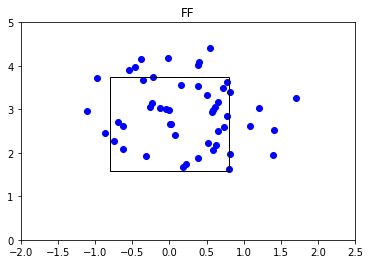

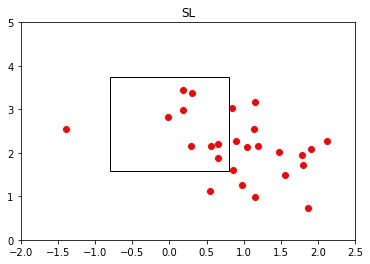

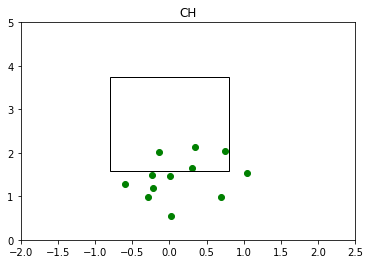

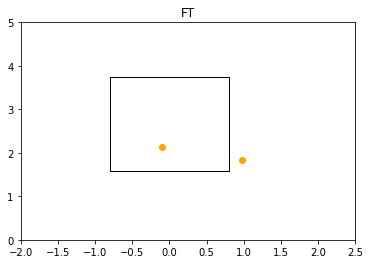

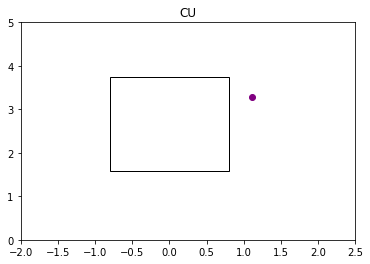

In [67]:
colors = ['blue', 'red', 'green', 'orange', 'purple']
for x in range(len(pitch_type)):
    test = pitch_type[x][:]
    test.pop([0][0])
    xs = [test[x][0] for x in range(len(test))]
    ys = [test[x][1] for x in range(len(test))]
    plt.scatter(xs,ys, c = colors[x])
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-0.8, 1.59), 1.6, 2.15, fill=None, alpha=1)) # Strike Zone
    plt.xlim(-2, 2.5)
    plt.ylim(0, 5)
    plt.title(pitch_type[x][0])
    plt.show()

Strike Zone size is about 20in wide 26in tall. about 18.25in off the ground and the top is around 44in off the ground.

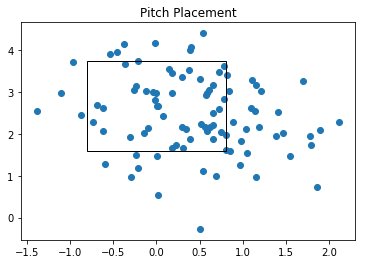

In [14]:
def strikezone_map(player_atbats):
    plt.scatter(player_atbats['px'],player_atbats['pz'])
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-0.8, 1.59), 1.6, 2.15, fill=None, alpha=1)) # Strike Zone
    # plt.xlim(-2, 2.5)
    # plt.ylim(0, 5)
    plt.title("Pitch Placement")
    plt.show()

strikezone_map(at_bat_stats)